In [ ]:
"""
Purpose: To take in a whole neuron that could have any number of somas
and then to split it into multiple neuron objects

Pseudocode: 
1) Get all of the split suggestions
2) Split all of the limbs that need splitting
3) Once have split the limbs, split the neuron object into mutliple objects


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

INFO - 2020-12-27 23:09:14,641 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-12-27 23:09:14,642 - settings - Setting database.user to celiib
INFO - 2020-12-27 23:09:14,643 - settings - Setting database.password to newceliipass
INFO - 2020-12-27 23:09:14,698 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2020-12-27 23:09:14,699 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-27 23:09:14,712 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2020-12-27 23:09:14,938 - settings - Setting enable_python_native_blobs to True


# Picking the Neuron

In [4]:
minnie,schema = du.configure_minnie_vm()

INFO - 2020-12-27 23:09:16,559 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-27 23:09:16,785 - settings - Setting enable_python_native_blobs to True


In [5]:
minnie.DecompositionMultiSoma() & "n_somas>=2" & "n_limbs>7"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134988402042,0,0.25,=BLOB=,939750,1891203,1,0,1,2,11,260,129,9926423.076049272,3837120.3077007174,19498.793,99.274,99.274,489.663,475.385,3464,0.00034896759622890023,13.323076923076924,6602403.65,127,nan,nan,158333783964.6377,22787252.596668243,15950.739027703696,23981.233556454503,1246722708.382974,2086.0103
864691134988472442,0,0.25,=BLOB=,760380,1540479,2,2,1,2,13,363,156,8953235.669383887,4544614.922947489,14310.191,84.402,84.402,468.087,373.666,2735,0.0003054761542078572,7.534435261707989,3995011.885,125,nan,nan,141833693783.9872,29636743.193003334,15841.612911966098,35502.696329021615,1134669550.2718978,2332.3713
864691135012400886,0,0.25,=BLOB=,802480,1644474,1,1,1,2,16,269,96,7875858.169030763,2360988.8843716034,18603.612,255.953,230.461,454.247,405.981,3810,0.00048375680697013807,14.1635687732342,6797185.75,192,nan,nan,237479305298.37152,35811946.28458786,30152.816391765566,34937.88665380691,1236871381.7623518,10256.3515
864691135081658359,0,0.25,=BLOB=,1607079,3235599,2,2,1,2,16,566,222,17383118.66936267,6172738.160942182,16478.245,104.692,104.692,487.313,428.015,6643,0.000382152370144497,11.736749116607774,10212426.203,268,nan,nan,279434899541.12573,20787632.10667928,16075.072882843688,27362.24419022377,1042667535.6012154,24169.9911
864691135103989069,0,0.25,=BLOB=,1245458,2502307,1,0,1,2,16,331,79,11756897.144402271,2465284.4707440175,20465.579,321.001,265.448,491.55,445.508,5678,0.0004829505549177511,17.154078549848943,8429003.434,209,nan,nan,303415329029.90393,27481356.392502148,25807.432463110978,35996.583867319365,1451747985.789014,7967.3317
864691135207768697,0,0.25,=BLOB=,1067465,2149606,2,1,1,2,17,260,85,8946738.643342396,2846658.3866573754,23190.431,358.987,309.871,566.021,515.849,4621,0.0005165010608014865,17.773076923076925,7806528.505,214,nan,nan,294025101920.43787,27074805.833293915,32863.942229857465,37664.0015766442,1373949074.3945694,19055.2293
864691135210033344,0,0.25,=BLOB=,1093479,2238756,2,1,1,2,11,367,186,11431382.161309652,5830748.601730345,16936.767,188.963,185.938,437.996,402.889,4500,0.0003936531852841539,12.26158038147139,7261235.173,202,nan,nan,276047625630.4887,31026774.45333735,24148.228248793228,38016.621009182774,1366572404.1113303,18653.8569
86469

In [6]:
segment_id = 864691135012400886 

In [12]:
neuron_obj = (minnie.DecompositionMultiSoma & dict(segment_id=segment_id)).fetch1("decomposition")
neuron_obj

Decompressing Neuron in minimal output mode...please wait


In [13]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(),
                     mesh_whole_neuron=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Preview of How th Neuron Will Need to be Split

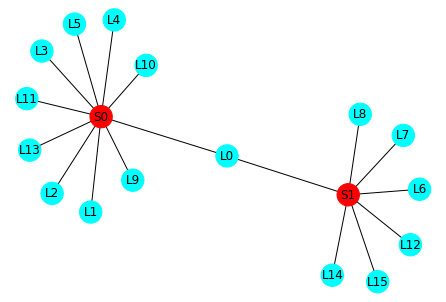

In [14]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [15]:
total_limbs_to_process = nru.error_limbs(neuron_obj)
total_limbs_to_process

array([0])

# Modules for functionality

In [49]:
import networkx as nx
import networkx_utils as xu
import trimesh_utils as tu
import preprocessing_vp2 as pre

In [33]:
verbose = False

# Part 1: Get the limb Splitting suggestions

In [36]:
import proofreading_utils as pru
limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False,
                                               verbose = verbose)

In [17]:
limb_results

{0: [{'starting_node_1': 7,
   'starting_node_2': 30,
   'title': 'S1_0 from S1_1 ',
   'edges_to_cut': [array([10, 33]), array([10, 34])],
   'edges_to_add': [array([33, 34])],
   'coordinate_suggestions': [array([852649., 445385., 726053.]),
    array([852649., 445385., 726053.])],
   'successful_disconnection': True},
  {'starting_node_1': 7,
   'starting_node_2': 24,
   'title': 'S1_0 from S0_0 ',
   'edges_to_cut': [],
   'edges_to_add': [],
   'coordinate_suggestions': [],
   'successful_disconnection': True},
  {'starting_node_1': 30,
   'starting_node_2': 24,
   'title': 'S1_1 from S0_0 ',
   'edges_to_cut': [array([54, 55])],
   'edges_to_add': [],
   'coordinate_suggestions': [array([851370.72587155, 480111.39970713, 696534.06737003])],
   'successful_disconnection': True}]}

# Part 2: Split the limbs using the suggested splits

In [44]:
nru = reload(nru)

In [46]:
split_neuron_obj = neuron_obj
new_concept_networks = pru.split_suggestions_to_concept_networks(neuron_obj,limb_results)

for curr_limb_idx,curr_limb_nx in new_concept_networks.items():
    curr_limb_idx = int(curr_limb_idx)

    conn_comp = list(nx.connected_components(curr_limb_nx))
    
    if verbose:
        print(f"\n\n---Working on Splitting Limb {curr_limb_idx} with {len(conn_comp)} components----")

    split_neuron_obj = pru.split_neuron_limb(split_neuron_obj,conn_comp,
                         curr_limb_idx = curr_limb_idx,
                                            verbose=verbose)

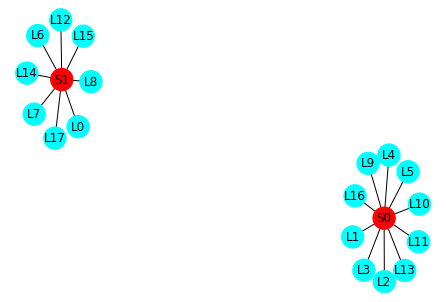

In [23]:
# visualize the results
nviz.plot_soma_limb_concept_network(split_neuron_obj)

# Part 3: Split into Multiple Neuron Objects (BY THEIR SOMAS)

In [47]:
curr_error_limbs = nru.error_limbs(split_neuron_obj)

if len(curr_error_limbs) > 0:
    raise Exception(f"There were still error limbs before trying the neuron object split: error limbs = {curr_error_limbs}")

In [27]:
soma_names = split_neuron_obj.get_soma_node_names()


['S0', 'S1']

In [56]:
neuron_obj_list = []

for curr_soma_idx,curr_soma_name in enumerate(soma_names):
    print(f"\n\n------ Working on Soma {curr_soma_idx} -------")
    
    neuron_cp = split_neuron_obj
    
    #getting all the soma information we will need for preprocessing
    soma_obj = neuron_cp[curr_soma_name]
    curr_soma_meshes = [soma_obj.mesh]
    curr_soma_sdfs = [soma_obj.sdf]
    curr_soma_volume_ratios = [soma_obj.volume_ratio]
    
    
    
    
    
    # getting the limb information and new soma connectivity
    limb_neighbors = np.sort(xu.get_neighbors(neuron_cp.concept_network,curr_soma_name)).astype("int")
    limb_neighbors = [int(k) for k in limb_neighbors]
    
    soma_to_piece_connectivity = neuron_cp.preprocessed_data["soma_to_piece_connectivity"][curr_soma_idx]

    if len(np.intersect1d(limb_neighbors,soma_to_piece_connectivity)) < len(soma_to_piece_connectivity):
        raise Exception(f"piece connectivity ({soma_to_piece_connectivity}) not match limb neighbors ({limb_neighbors})")

    curr_soma_to_piece_connectivity = {0:np.arange(0,len(limb_neighbors))}
    
    
    
    
    
    
    #getting the whole mesh and limb face correspondence
    mesh_list_for_whole = [soma_obj.mesh]

    #for the limb meshes
    limb_meshes = []

    #for the limb mesh faces idx
    counter = len(curr_soma_meshes[0].faces)
    face_idx_list = [np.arange(0,counter)]

    old_node_to_new_node_mapping = dict()


    for i,k in  enumerate(limb_neighbors):

        #getting the name mapping
        old_node_to_new_node_mapping[k] = i

        #getting the meshes of the limbs
        limb_mesh = neuron_cp[k].mesh
        limb_meshes.append(limb_mesh)


        mesh_list_for_whole.append(limb_mesh)
        face_length = len(limb_mesh.faces)
        face_idx_list.append(np.arange(counter,counter + face_length))
        counter += face_length

    whole_mesh = tu.combine_meshes(mesh_list_for_whole)

    
    
    
    
    
    # generating the new limb correspondence:
    curr_limb_correspondence = dict([(i,neuron_cp.preprocessed_data["limb_correspondence"][k]) for i,k in enumerate(limb_neighbors)])

    
    
    
    
    
    
    
    # concept network generation
    curr_limb_network_stating_info = dict()


    for k in limb_neighbors:

        local_starting_info = neuron_cp.preprocessed_data["limb_network_stating_info"][k]

        #making sure the soma has the right name
        soma_keys = list(local_starting_info.keys())
        if len(soma_keys) > 1:
            raise Exception("More than one soma connection")
        else:
            soma_key = soma_keys[0]

        if soma_key != 0:
            local_starting_info = {0:local_starting_info[soma_key]}


        #making sure the soma group has the right name
        starting_group_keys = list(local_starting_info[0].keys())
        if len(starting_group_keys) > 1 or starting_group_keys[0] != 0:
            raise Exception("Touching group was not equal to 0")

        #save the new starting info
        curr_limb_network_stating_info[old_node_to_new_node_mapping[k]] = local_starting_info

    # creating the new concept networks from the starting info
    curr_limb_concept_networks=dict()

    for curr_limb_idx,new_limb_correspondence_indiv in curr_limb_correspondence.items():
        limb_to_soma_concept_networks = pre.calculate_limb_concept_networks(new_limb_correspondence_indiv,
                                                                            curr_limb_network_stating_info[curr_limb_idx],
                                                                            run_concept_network_checks=True,
                                                                           )   

        curr_limb_concept_networks[curr_limb_idx] = limb_to_soma_concept_networks
    
    
    
    
    
    
    
    
    #limb labels:
    curr_limb_labels = dict()

    for k in limb_neighbors:
        local_limb_labels = neuron_cp.preprocessed_data["limb_labels"][k]
        if local_limb_labels is None or local_limb_labels == "Unlabeled":
            local_limb_labels = []

        local_limb_labels.append(f"Soma_{curr_soma_idx}_originally")
        curr_limb_labels[old_node_to_new_node_mapping[k]] = local_limb_labels

        
        
        
        
        
        
        
        
    #using all of the data to create new preprocessing info
    new_preprocessed_data = preprocessed_data= dict(
            #soma data
            soma_meshes = curr_soma_meshes,
            soma_sdfs = curr_soma_sdfs,
            soma_volume_ratios=curr_soma_volume_ratios,

            #soma connectivity
            soma_to_piece_connectivity = curr_soma_to_piece_connectivity,

            # limb info
            limb_correspondence=curr_limb_correspondence,
            limb_meshes=limb_meshes,
            limb_mehses_face_idx = face_idx_list,
            limb_labels=curr_limb_labels,

            #concept network info
            limb_concept_networks=curr_limb_concept_networks,
            limb_network_stating_info=curr_limb_network_stating_info,


            # the other mesh pieces that will not be included
            insignificant_limbs=None,
            not_processed_soma_containing_meshes=None,
            non_soma_touching_meshes=None,
            inside_pieces=None,


            )

    limb_to_branch_objects = dict()
    for k in limb_neighbors:
        limb_obj = neuron_cp[int(k)]
        branch_dict = dict([(b,limb_obj[int(b)]) for b in limb_obj.get_branch_names()])
        limb_to_branch_objects[old_node_to_new_node_mapping[k]] = branch_dict

    segment_id = neuron_cp.segment_id
    description = f"{neuron_cp.description}_soma_{curr_soma_idx}_split"
    
    
    
    
    
    # new neuron object:
    
    single_split_neuron_obj = neuron.Neuron(mesh=whole_mesh,
             segment_id=segment_id,
             description=description,
             preprocessed_data=new_preprocessed_data,
             limb_to_branch_objects=limb_to_branch_objects,
             widths_to_calculate=[],
            suppress_output=not verbose)
    
    
    neuron_obj_list.append(single_split_neuron_obj)



------ Working on Soma 0 -------
Processing Neuorn in minimal output mode...please wait
Total time for neuron instance creation = 0.495466947555542


------ Working on Soma 1 -------
Processing Neuorn in minimal output mode...please wait
Total time for neuron instance creation = 0.42835545539855957


# Visualizing the results

In [57]:
print(f"Number of seperate neuron objects = {len(neuron_obj_list)}")

Number of seperate neuron objects = 2


In [58]:
for n_obj in neuron_obj_list:
    nviz.visualize_neuron(n_obj,
                         visualize_type=["mesh","skeleton"],
                         limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton



 Working on visualization type: mesh

 Working on visualization type: skeleton
